In [1]:
import sys
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

sys.path.insert(0, os.path.abspath('..'))

from src.models.reshape import data_for_timeframe
from src.visualization.visualize import change_matplotlib_font
from src.visualization.colors import purple, blue, red, green, orange

change_matplotlib_font()

font family:  ['Noto Sans KR']


In [2]:
listen_history = pd.read_parquet("../data/processed/listen_history.parquet.gzip")
listen_history.head()

,title,subtitles,time,artist,date,month
0,right where you left me (bonus track),"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2023-08-04 16:43:04.189000+00:00,Taylor Swift,2023-08-04,2023-08-01
1,Last Kiss (Taylor's Version),"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2023-08-04 16:36:53.707000+00:00,Taylor Swift,2023-08-04,2023-08-01
2,Love Story (Taylor’s Version),"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2023-08-04 16:32:56.779000+00:00,Taylor Swift,2023-08-04,2023-08-01
3,Mine (Taylor's Version),"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2023-08-04 16:29:04.570000+00:00,Taylor Swift,2023-08-04,2023-08-01
4,Snow On The Beach,"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2023-08-04 16:24:48.046000+00:00,Taylor Swift,2023-08-04,2023-08-01


In [3]:
artist = 'Taylor Swift'

def track_share_by_month():
    category = 'title'
    grouped_data = (
        listen_history
            .query(f'artist == "{artist}"')
            .groupby(['month', category])
            .size()
            .reset_index(name='count')
    )

    grouped_data['percentage'] = grouped_data['count'] / grouped_data.groupby('month')['count'].transform('sum') * 100
    track_share_by_month = (
        grouped_data[['month', category, 'percentage']]
        .groupby(['month', category])
        .sum()
        .reset_index()
        .pivot(index='month', columns=category, values='percentage')
        .fillna(0)
        .reset_index()
    )
    track_share_by_month.set_index('month', inplace=True)
    return track_share_by_month

track_share_by_month().tail()

title,... Ready For It?,1,22,Afterglow,All Of The Girls You Loved Before,All Too Well (10 Minute Version) (Taylor's Version) (From The Vault),All Too Well (Taylor's Version),Anti-Hero,Are Never Ever Getting Back Together,Back To December,...,mirrorball,mpagne problems,my tears ricochet,"ould've, Could've, Should've",rdigan,rdigan (cabin in candlelight Version),right where you left me (bonus track),ugust,willow,xile
month,,,,,,,,,,,,,,,,,,,,,
2023-04-01,0.724638,0.000000,0.724638,0.724638,0.724638,0.724638,0.724638,0.724638,0.724638,0.724638,...,0.000000,0.000000,0.000000,0.000000,0.724638,0.000000,0.000000,0.724638,0.724638,0.000000
2023-05-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-06-01,0.584795,1.754386,0.584795,0.584795,1.169591,0.584795,0.584795,0.000000,0.000000,0.000000,...,0.584795,1.169591,1.169591,1.169591,0.000000,0.584795,0.584795,0.000000,0.000000,0.584795
2023-07-01,0.000000,0.537634,0.000000,0.537634,0.537634,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.537634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.537634
2023-08-01,0.000000,1.724138,0.000000,1.724138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.724138,1.724138,0.000000,0.000000,0.000000,1.724138,0.000000,0.000000,1.724138


In [4]:
top_three_tracks = (
    listen_history
    .query(f'artist == "{artist}"')[['title', 'month']]
    .groupby('title')
    .size()
    .reset_index(name='count')
    .sort_values("count", ascending=False)
    .head(5)['title']
    .tolist()
)
top_three_tracks

['Enchanted',
 "Treacherous (Taylor's Version)",
 'You Belong With Me (Taylor’s Version)',
 'The Way I Loved You (Taylor’s Version)',
 'Lover']

In [5]:
def plot_for_track(df):
    grays = ['0.5', '0.6', '0.7', '0.8']
    colors = [purple, blue, red, green, orange] + grays * math.ceil((len(df.columns) - 4)/len(grays))

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.stackplot(df.index, df.T, labels=df.columns, alpha=0.7, colors=colors)

    ax.set_title(f'Ratio of {artist} Listens vs. Other Artist Listens Each Month')
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('Month')
    ordered_legend = top_three_tracks
    ordered_legend.reverse()
    ax.legend(ordered_legend + ['Other'], loc="upper left", bbox_to_anchor=(1,1));

    plt.show()
    fig.savefig(f"../reports/figures/tracks/ratio_of_{artist.lower().replace(' ', '_')}_track_listens.png", bbox_inches='tight')

/var/folders/_k/2ptdf0mx30x7g5xgmyh1gqwr0000gn/T/ipykernel_83524/2728454694.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.insert(0, col.name, col)
/var/folders/_k/2ptdf0mx30x7g5xgmyh1gqwr0000gn/T/ipykernel_83524/2728454694.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.insert(0, col.name, col)
/var/folders/_k/2ptdf0mx30x7g5xgmyh1gqwr0000gn/T/ipykernel_83524/2728454694.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

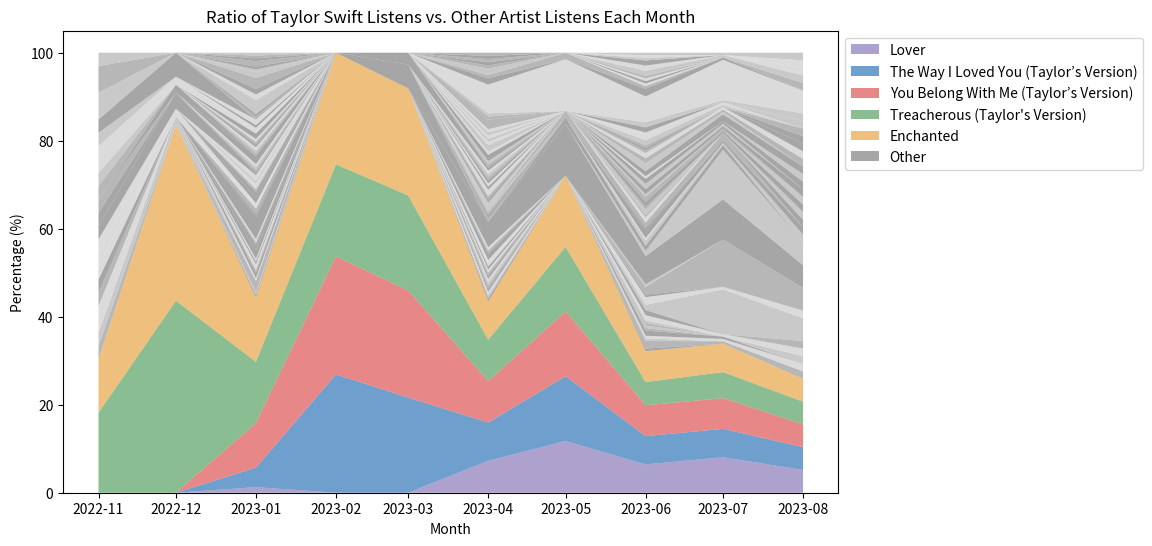

In [6]:
data = track_share_by_month()
for track in top_three_tracks:
    col = data.pop(track)
    data.insert(0, col.name, col)
    
plot_for_track(data)